## Candidate No. 277207

## Installing Necessary Libraries

In [1]:
#conda install pytorch torchvision 

In [1]:
import torch
import random
import pandas as pd
import numpy as np
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Loading the Dataset

In [2]:
data1 = 'Food trade indicators - FAOSTAT_data_en_2-22-2024.csv'
data2 = 'Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv'
data3 = 'Crops production indicators - FAOSTAT_data_en_2-22-2024.csv'
data4 = 'Emissions - FAOSTAT_data_en_2-27-2024.csv'
data5 = 'Food balances indicators - FAOSTAT_data_en_2-22-2024.csv'
data6 = 'Exchange rate - FAOSTAT_data_en_2-22-2024.csv'
data7 = 'Land temperature change - FAOSTAT_data_en_2-27-2024.csv'
data8 = 'Fertilizers use - FAOSTAT_data_en_2-27-2024.csv'
data9 = 'Food security indicators  - FAOSTAT_data_en_2-22-2024.csv'
data10 = 'Land use - FAOSTAT_data_en_2-22-2024.csv'
data11= 'Employment - FAOSTAT_data_en_2-27-2024.csv'
data12= 'Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv'
data13='Pesticides use - FAOSTAT_data_en_2-27-2024.csv'

In [ ]:
df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)
df3 = pd.read_csv(data3)
df4 = pd.read_csv(data4)
df5 = pd.read_csv(data5)
df6 = pd.read_csv(data6)
df7 = pd.read_csv(data7)
df8 = pd.read_csv(data8)
df9 = pd.read_csv(data9)
df10 = pd.read_csv(data10)
df11 = pd.read_csv(data11)
df12 = pd.read_csv(data12)
df13 = pd.read_csv(data13)

# Data Pre-Processing

## Deriving the Export Value and Import Value from dataframe 1

In [4]:
codes = ["F1896","F1890","F1889","F1888","F1848","F1847","F1846","F1844"] # Fetching the codes of items that come from crops
df1 = df1[df1["Item Code (CPC)"].isin(codes)] # Filtering the items that come from crops and overwriting df1 
df1["Item"].value_counts()

Other food                          12349
Non-food                            12297
Fruit and Vegetables                12259
Cereals and Preparations            12036
Sugar and Honey                     11908
Fats and Oils (excluding Butter)    11884
Tobacco                             11677
Non-edible Fats and Oils            10434
Name: Item, dtype: int64

In [5]:
exportval_df1 = df1[df1["Element"] == "Export Value"] #extracting the export value and saving it in a new variable 

exportval_df1 = exportval_df1.groupby(["Area","Year"], as_index=False).Value.sum() #Grouping on Area and Year
exportval_df1.rename(columns={'Value': 'Total_Export_Value'},inplace = True)

exportval_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                6180 non-null   object 
 1   Year                6180 non-null   int64  
 2   Total_Export_Value  6180 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 145.0+ KB


In [6]:
importval_df1 = df1[df1["Element"] == "Import Value"] #extracting the import value and saving it in a new variable 

importval_df1 = importval_df1.groupby(["Area","Year"], as_index=False).Value.sum() #Grouping on Area and Year
importval_df1.rename(columns={'Value': 'Total_Import_Value'},inplace = True)
importval_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                6205 non-null   object 
 1   Year                6205 non-null   int64  
 2   Total_Import_Value  6205 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 145.6+ KB


In [76]:
combined_df1 = pd.merge(exportval_df1, importval_df1, on=['Area', 'Year'],how='outer') # merging the import and export value df
df1 = combined_df1
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 0 to 6204
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                6205 non-null   object 
 1   Year                6205 non-null   int64  
 2   Total_Export_Value  6180 non-null   float64
 3   Total_Import_Value  6205 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 242.4+ KB


## Deriving Consumer Prices and Food Indices from dataframe 2

In [8]:
foodindices_df2 = df2[df2["Item"] == "Consumer Prices, Food Indices (2015 = 100)"] #Filtering out on the basis of consumer prices and food indices

foodindices_df2 = foodindices_df2.groupby(["Area","Year"], as_index=False).Value.mean() #Grouping on area and year
foodindices_df2.rename(columns={'Value': 'Food Indices'},inplace = True) #Renaming the columns

foodindices_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          4856 non-null   object 
 1   Year          4856 non-null   int64  
 2   Food Indices  4856 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 113.9+ KB


In [9]:
foodinflation_df2 = df2[df2["Item"] == "Food price inflation"] #Filtering out on the basis of food price inflation

foodinflation_df2 = foodinflation_df2.groupby(["Area","Year"], as_index=False).Value.mean() #Grouping on area and year
foodinflation_df2.rename(columns={'Value': 'Food Inflation'},inplace = True) #Renaming the columns

foodinflation_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            4653 non-null   object 
 1   Year            4653 non-null   int64  
 2   Food Inflation  4653 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 109.2+ KB


In [77]:
combined_df2 = pd.merge(foodinflation_df2, foodindices_df2, on=['Area', 'Year'],how='outer')
df2 = combined_df2 # Combining the two dataframes created from df2 into one above
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4856 entries, 0 to 4855
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            4856 non-null   object 
 1   Year            4856 non-null   int64  
 2   Food Inflation  4653 non-null   float64
 3   Food Indices    4856 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 189.7+ KB


## Deriving yield  from dataframe 3

In [11]:
df3 = df3.groupby(["Area","Year"], as_index=False).Value.sum() #Grouping on the basis of area and year
df3.rename(columns={'Value': 'Yield'},inplace = True) #renaming the column
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    4587 non-null   object
 1   Year    4587 non-null   int64 
 2   Yield   4587 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 107.6+ KB


## Deriving Emissions  from dataframe 4

In [12]:
dfN20 = df4[df4["Element"] == "Emissions (N2O)"] #Fetching nitrogen emissions from the dataframe

dfCO2 = df4[df4["Element"] == "Emissions (CO2)"] # fetching carbon emissions from the dataframe

dfN20 = dfN20.groupby(["Area","Year"], as_index=False).Value.sum() # grouping it on year and year
dfN20.rename(columns={'Value': 'N2O Emmision'},inplace = True)# Renaming the column

dfCO2 = dfCO2.groupby(["Area","Year"], as_index=False).Value.sum() # grouping it on year and year
dfCO2.rename(columns={'Value': 'CO2 Emmision'},inplace = True) # Renaming the column

combined_df4 = pd.merge(dfN20, dfCO2, on=['Area', 'Year'],how='outer') #Merging both emissions
combined_df4.info()
df4 = combined_df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5130 entries, 0 to 5129
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          5130 non-null   object 
 1   Year          5130 non-null   int64  
 2   N2O Emmision  5130 non-null   float64
 3   CO2 Emmision  5130 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 200.4+ KB


## Deriving import export quantity , Food consumption features  from dataframe 5

In [13]:
item_codes = ["S2923","S2919","S2918","S2914","S2913","S2912","S2911","S2909","S2908","S2907","S2905"]
df5 = df5[df5["Item Code (FBS)"].isin(item_codes)] #Filtering df5 on the basis of our desirable item codes

In [14]:
importdf5 = df5[df5["Element Code"] == 5611] #fetching element 1 to a newdf

exportdf5 = df5[df5["Element Code"] == 5911] #fetching element 2 to a newdf

consumedf5 = df5[df5["Element Code"] == 5142] #fetching element 3 to a newdf

lossdf5 = df5[df5["Element Code"] == 5123] #fetching element 4 to a newdf

otherdf5 = df5[df5["Element Code"] == 5154] #fetching element 5 to a newdf

In [15]:
importdf5 = importdf5.groupby(["Area","Year"], as_index=False).Value.sum() #grouping element 1 on the basis of year and area
importdf5.rename(columns={'Value': 'Import Quantity'},inplace = True) # reneaming and giving actual element name

exportdf5 = exportdf5.groupby(["Area","Year"], as_index=False).Value.sum() #grouping element 2 on the basis of year and area
exportdf5.rename(columns={'Value': 'Export Quantity'},inplace = True) # reneaming and giving actual element name

consumedf5 = consumedf5.groupby(["Area","Year"], as_index=False).Value.sum() #grouping element 3 on the basis of year and area
consumedf5.rename(columns={'Value': 'Total Food Consumption'},inplace = True)  # reneaming and giving actual element name

lossdf5 = lossdf5.groupby(["Area","Year"], as_index=False).Value.sum() #grouping element 4 on the basis of year and area
lossdf5.rename(columns={'Value': 'Total Food Lost'},inplace = True) # reneaming and giving actual element name

otherdf5 = otherdf5.groupby(["Area","Year"], as_index=False).Value.sum() #grouping element 5 on the basis of year and area
otherdf5.rename(columns={'Value': 'Other Use'},inplace = True) # reneaming and giving actual element name

In [16]:
combined_df5 = pd.merge(importdf5, exportdf5, on=['Area', 'Year'], how='outer')  # Merging all 5 elements grouped under area and year 
combined_df5 = pd.merge(combined_df5, consume_df, on=['Area', 'Year'], how='outer')
combined_df5 = pd.merge(combined_df5, loss_df, on=['Area', 'Year'], how='outer')
combined_df5 = pd.merge(combined_df5, other_df, on=['Area', 'Year'], how='outer')
df5 = combined_df5

## Deriving Exchange rate from datafrme 6

In [74]:
df6 = df6.groupby(["Area","Year"], as_index=False).Value.mean() #grouping on area and year using mean
df6.rename(columns={'Value': 'Exchange_rate'},inplace = True) #renaming the column 
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8639 entries, 0 to 8638
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           8639 non-null   object 
 1   Year           8639 non-null   int64  
 2   Exchange_rate  8639 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 202.6+ KB


## Deriving Temperature change from dataframe 7

In [75]:
df7 = df7[df7["Element Code"] == 7271] #Filtering on desirable item code 
df7 = df7[df7["Months Code"] == 7020]  #Filtering on desirable month code
df7 = df7.groupby(["Area","Year"], as_index=False).Value.mean() #grouping by tyear and year using mean
df7.rename(columns={'Value': 'Temperature_change'},inplace = True) #renaming the column
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                5481 non-null   object 
 1   Year                5481 non-null   int64  
 2   Temperature_change  5219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 128.6+ KB


## Deriving Fertilizers used from dataframe 8

In [19]:
df8 = df8.groupby(["Area","Year"], as_index=False).Value.mean()
df8.rename(columns={'Value': 'Fertilizer_Used'},inplace = True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             1933 non-null   object 
 1   Year             1933 non-null   int64  
 2   Fertilizer_Used  1933 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 45.4+ KB


## Deriving Import export ratio, political stability, production and supply variability and energy suppy adequety used from dataframe 9

In [80]:
adequetydf9 = df9[df9["Item Code"] == 21010] #fetching the desried irems using their codes
productiondf9 = df9[df9["Item Code"] == 21030]
supplydf9 = df9[df9["Item Code"] == 21031]
stabilitydf9 = df9[df9["Item Code"] == 21032]
ratiodf9 = df9[df9["Item Code"] == 21033]



adequetydf9['Year'] = adequetydf9['Year'].apply(lambda x: x.split('-')[-1]) #using lambda function to  split th combined years
adequetydf9 = adequetydf9[["Area","Year","Value"]] #filtering on area year and value
adequetydf9.rename(columns={'Value': 'Energy_Supply_Adequety'},inplace = True)

productiondf9 = productiondf9[["Area","Year","Value"]] #filtering production on area year and value
productiondf9.rename(columns={'Value': 'Production_Variability'},inplace = True) #renaming the columns

supplydf9 = supplydf9[["Area","Year","Value"]]  #filtering supply on area year and value
supplydf9.rename(columns={'Value': 'Supply_Variability'},inplace = True) #renaming the columns

stability_df = stability_df[["Area","Year","Value"]] #filtering stability on area year and value
stability_df.rename(columns={'Value': 'Political_Stability'},inplace = True)  #renaming the columns

ratiodf9['Year'] = ratiodf9['Year'].apply(lambda x: x.split('-')[-1]) #using lambda function to  split th combined years
ratiodf9 = ratiodf9[["Area","Year","Value"]] #filtering ratio on area year and value
ratiodf9.rename(columns={'Value': 'Import_export_ratio'},inplace = True) #renaming the columns

combined_df9 = pd.merge(adequetydf9, productiondf9, on=['Area', 'Year'], how='outer') #merging all the elements
combined_df9 = pd.merge(combined_df9, supplydf9, on=['Area', 'Year'], how='outer')
combined_df9 = pd.merge(combined_df9, stabilitydf9, on=['Area', 'Year'], how='outer')
combined_df9 = pd.merge(combined_df9, ratiodf9, on=['Area', 'Year'], how='outer')
combined_df9['Year'] = combined_df9['Year'].astype('int64')
df9 = combined_df9
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4619 entries, 0 to 4618
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    4619 non-null   object 
 1   Year                    4619 non-null   int64  
 2   Energy_Supply_Adequety  3658 non-null   float64
 3   Production_Variability  3920 non-null   float64
 4   Supply_Variability      3776 non-null   float64
 5   Political_Stability     4074 non-null   float64
 6   Import_export_ratio     3858 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 288.7+ KB


## Deriving Land Area from Dataframe 10

In [78]:
df10 = df10[(df10['Item'] == 'Land area')].groupby(['Area', 'Year'])['Value'].first().reset_index()
df10.rename(columns={'Value': 'Land Use'},inplace = True)
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9519 entries, 0 to 9518
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      9519 non-null   object 
 1   Year      9519 non-null   int64  
 2   Land Use  9519 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 223.2+ KB


## Deriving Total Employee and hours from Dataframe 11

In [79]:
hoursdf11 =  df11[df11["Indicator Code"] == 21150] # Filtering out the indicator code 
hoursdf11 = hoursdf11[["Area","Year","Value"]]  #getting hours value
hoursdf11.rename(columns={'Value': 'Mean_Weekly_Hours'},inplace = True) 

employeesdf11 =  df11[df11["Indicator Code"] == 21144] #Filtering out the indicator code 
employeesdf11 =  employeesdf11[["Area","Year","Value"]] # getting employees  value
employeesdf11.rename(columns={'Value': 'Total_Employee'},inplace = True)

combined_df11 = pd.merge(hoursdf11, employeesdf11, on=['Area', 'Year'], how='outer') # merging the dataframes
df11= combined_df11
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4221 entries, 0 to 4220
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4221 non-null   object 
 1   Year               4221 non-null   int64  
 2   Mean_Weekly_Hours  1739 non-null   float64
 3   Total_Employee     4182 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 164.9+ KB


## Deriving Total Inflow and Outflow and hours from Dataframe 12

In [23]:
inflowdf12 =  df12[df12["Item Code"] == 23084] #Filtering on itemcode
inflowdf12 = inflowdf12[["Area","Year","Value"]] #getting inflow value 
inflowdf12.rename(columns={'Value': 'Total_Inflow'},inplace = True)

outflowdf12 =  df12[df12["Item Code"] == 23085]  #Filtering on itemcode
outflowdf12 =  outflowdf12[["Area","Year","Value"]] #getting out flow value 
outflowdf12.rename(columns={'Value': 'Total_Outflow'},inplace = True)

combined_df12 = pd.merge(inflowdf12, outflowdf12, on=['Area', 'Year'], how='outer') #combining the dataframes
df12= combined_df12
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 3580
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           3581 non-null   object 
 1   Year           3581 non-null   int64  
 2   Total_Inflow   697 non-null    float64
 3   Total_Outflow  3579 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 139.9+ KB


## Deriving Pesticides use from Dataframe 13

In [24]:
df13 =  df13[df13["Element Code"] == 5157] #fetching the desired element through its code
df13 =  df13[df13["Item Code"] == 1357] #fetching the desired item through its code
df13 =  df13[["Area","Year","Value"]]
df13.rename(columns={'Value': 'Pesticide_Used'},inplace = True)#renaming the column 
df13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4636 entries, 0 to 35067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            4636 non-null   object 
 1   Year            4636 non-null   int64  
 2   Pesticide_Used  4636 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 144.9+ KB


# Merging all the Dataframes together

In [81]:
cleaned_df = pd.merge(df1, df2, on=['Area', 'Year'],how='outer') # merging all the frames together 
cleaned_df = pd.merge(cleaned_df, df3, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df4, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df5, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df6, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df7, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df8, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df9, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df10, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df11, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df12, on=['Area', 'Year'],how='outer')
cleaned_df = pd.merge(cleaned_df, df13, on=['Area', 'Year'],how='outer')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10449 entries, 0 to 10448
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    10449 non-null  object 
 1   Year                    10449 non-null  int64  
 2   Total_Export_Value      6184 non-null   float64
 3   Total_Import_Value      6209 non-null   float64
 4   Food Inflation          4653 non-null   float64
 5   Food Indices            4856 non-null   float64
 6   Yield                   4591 non-null   float64
 7   N2O Emmision            5134 non-null   float64
 8   CO2 Emmision            5134 non-null   float64
 9   Import Quantity         2176 non-null   float64
 10  Export Quantity         2176 non-null   float64
 11  Total Food Consumption  2176 non-null   float64
 12  Total Food Lost         2176 non-null   float64
 13  Other Use               2149 non-null   float64
 14  Exchange_rate           8639 non-null 

## Dropping and adding necessary columns

In [26]:
df = cleaned_df.drop('Fertilizer_Used', axis=1) # As it has very less values and more NANs 
#Shifting  the target column to the 3rd year export value. so model will be trained on the 3rd year directly
df['Export_Value(3rd_year)'] = df.sort_values('Year').groupby('Area')['Total_Export_Value'].shift(-3)

#Dropping NANS if any 
df.dropna(subset= ['Export_Value(3rd_year)'],inplace=True)

## Dealing with the missing values

In [27]:
df = df.interpolate(method='linear', limit_direction='backward') #doing interpolation bethod to fill NANS
df = df.interpolate(method='linear', limit_direction='forward')

# Printing the interpolated DataFrame
print("Interpolated DataFrame:")
df

Interpolated DataFrame:


,Area,Year,Total_Export_Value,Total_Import_Value,Food Inflation,Food Indices,Yield,N2O Emmision,CO2 Emmision,Import Quantity,...,Supply_Variability,Political_Stability,Import_export_ratio,Land Use,Mean_Weekly_Hours,Total_Employee,Total_Inflow,Total_Outflow,Pesticide_Used,Export_Value(3rd_year)
0,Afghanistan,1991,98243.00,125520.00,12.780692,26.629848,661957.0,0.0,0.0,2897.0,...,58.0,-2.44,240.0,65223.0,31.68,2765.95,3.685277,1.000000,307.98,50357.0
1,Afghanistan,1992,42112.00,128605.00,12.780692,26.629848,661957.0,0.0,0.0,2897.0,...,58.0,-2.44,240.0,65223.0,31.68,2765.95,3.685277,1.000000,307.98,49596.0
2,Afghanistan,1993,44564.00,132076.00,12.780692,26.629848,661957.0,0.0,0.0,2897.0,...,58.0,-2.44,240.0,65223.0,31.68,2765.95,3.685277,1.000000,307.98,63773.0
3,Afghanistan,1994,50357.00,112377.00,12.780692,26.629848,661957.0,0.0,0.0,2897.0,...,58.0,-2.44,240.0,65223.0,31.68,2765.95,3.685277,1.000000,307.98,62071.0
4,Afghanistan,1995,49596.00,213741.00,12.780692,26.629848,661957.0,0.0,0.0,2897.0,...,58.0,-2.44,240.0,65223.0,31.68,2765.95,3.685277,1.000000,307.98,59869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,Tuvalu,1989,1887161.27,3258.85,20.393323,36.970536,164515.0,0.0,0.0,844.0,...,39.0,-2.52,18.0,3.0,18.28,3593.58,3512.000000,22.208128,2.17,0.0
10351,Tuvalu,1990,1887161.27,3258.85,20.393323,36.970536,164515.0,0.0,0.0,844.0,...,39.0,-2.52,18.0,3.0,18.28,3593.58,3512.000000,22.208128,2.17,11.0
10360,USSR,1988,1887161.27,3258.85,20.393323,36.970536,164515.0,0.0,0.0,844.0,...,39.0,-2.52,18.0,2192334.0,18.28,3593.58,3512.000000,22.208128,2.17,1540785.0
10434,Yemen,1988,1887161.27,3258.85,20.393323,36.970536,164515.0,0.0,0.0,844.0,...,39.0,-2.52,18.0,52797.0,18.28,3593.58,3512.000000,22.208128,2.17,45108.0


# Exploratory Data Analysis

### Plotting a KDE to check the distrubution of the data

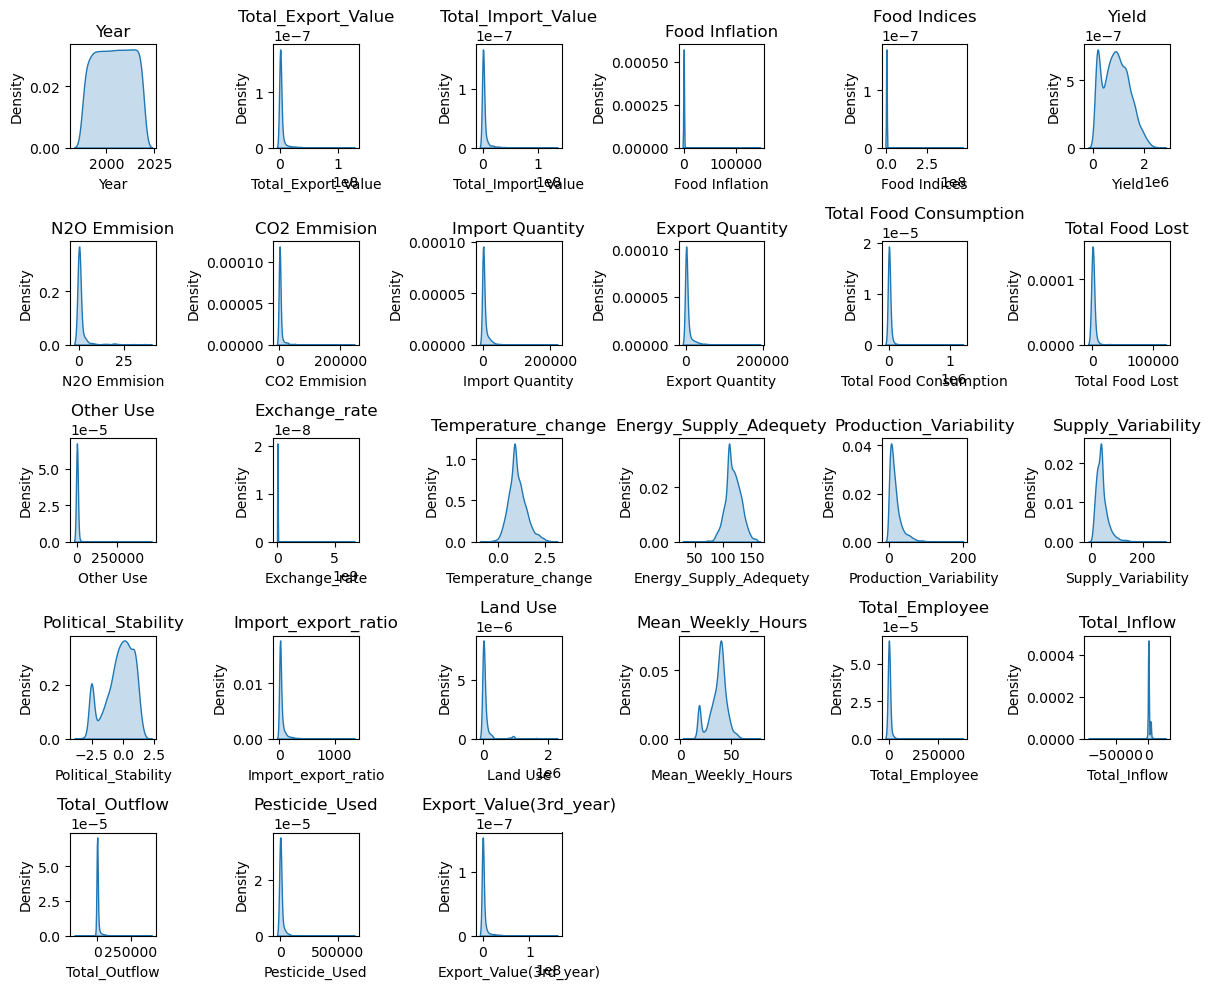

In [31]:
import warnings
warnings.filterwarnings("ignore")

# KDE Plot
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(df[col], shade=True)
    plt.title(col)
    plt.tight_layout()
#plt.suptitle('KDE Plots')
plt.show()

## Plotting a scatter plot for each feature against the label 

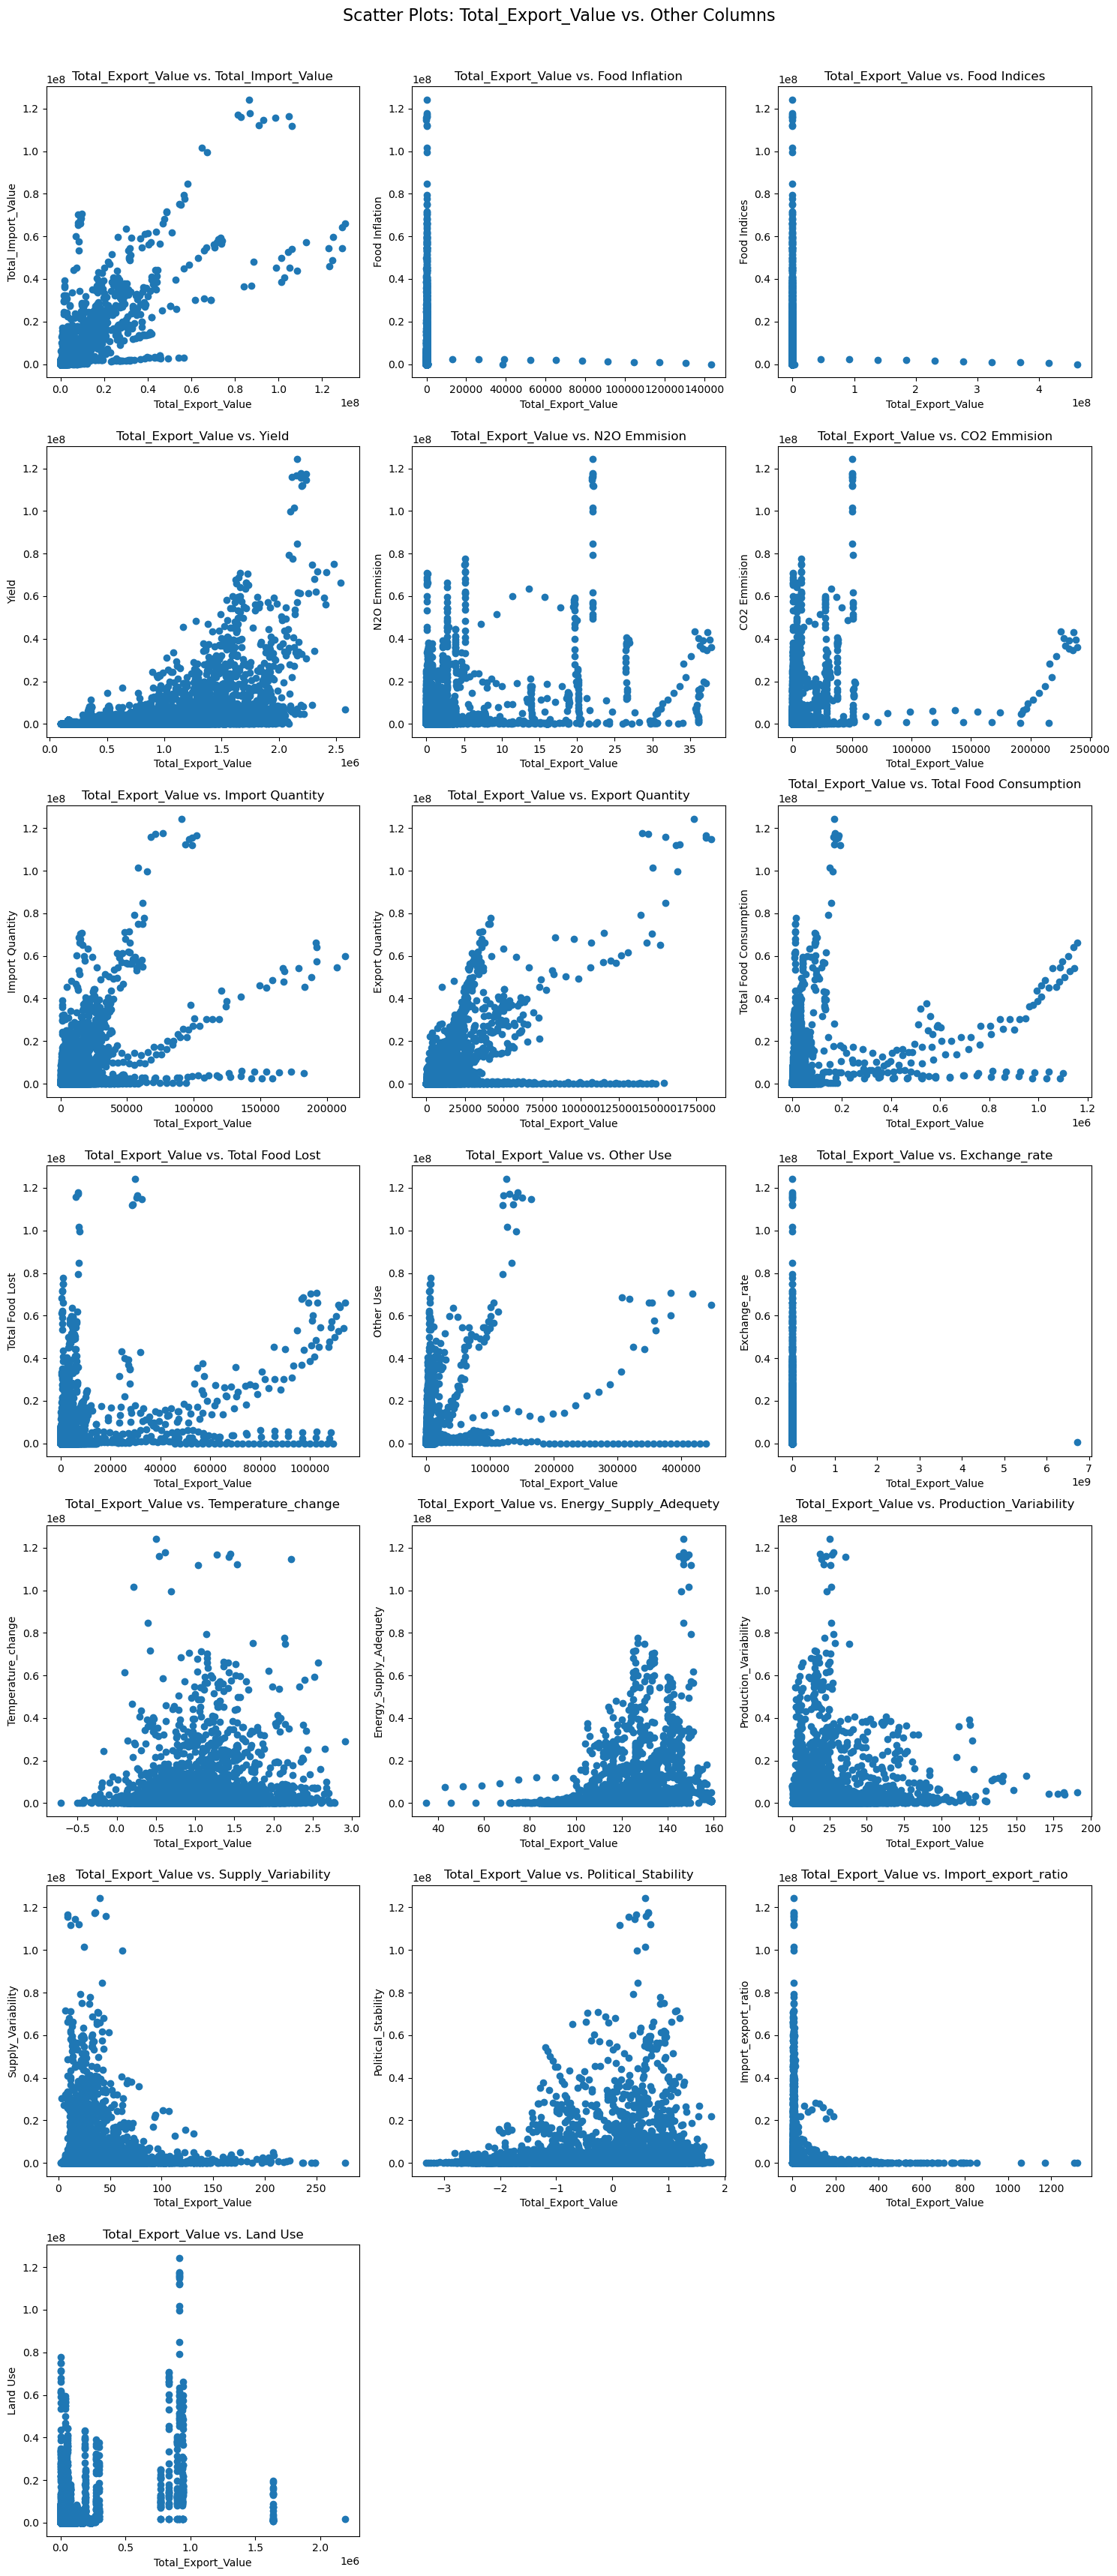

In [84]:
import matplotlib.pyplot as plt

#defining column names as a list
numeric_columns = ['Total_Import_Value',
       'Food Inflation', 'Food Indices', 'Yield', 'N2O Emmision',
       'CO2 Emmision', 'Import Quantity', 'Export Quantity',
       'Total Food Consumption', 'Total Food Lost', 'Other Use',
       'Exchange_rate', 'Temperature_change', 'Energy_Supply_Adequety',
       'Production_Variability', 'Supply_Variability', 'Political_Stability',
       'Import_export_ratio', 'Land Use']
# Creating a grid of subplots
rows = len(numeric_columns) // 3 + 1
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
fig.suptitle('Scatter Plots: Total_Export_Value vs. Other Columns', fontsize=16)

# Iterating over the numeric columns and create scatter plots
for i, col in enumerate(numeric_columns):
    if col != 'Total_Export_Value':
        row = i // cols
        col = i % cols
        axes[row, col].scatter(df[numeric_columns[i]], df['Total_Export_Value'])
        axes[row, col].set_ylabel(numeric_columns[i])  
        axes[row, col].set_xlabel('Total_Export_Value')
        axes[row, col].set_title(f'Total_Export_Value vs. {numeric_columns[i]}')

# Removing empty subplots
for i in range(len(numeric_columns), rows * cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axes[row, col])

# Adjusting the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Plotting a BoxPlot to check for outliers

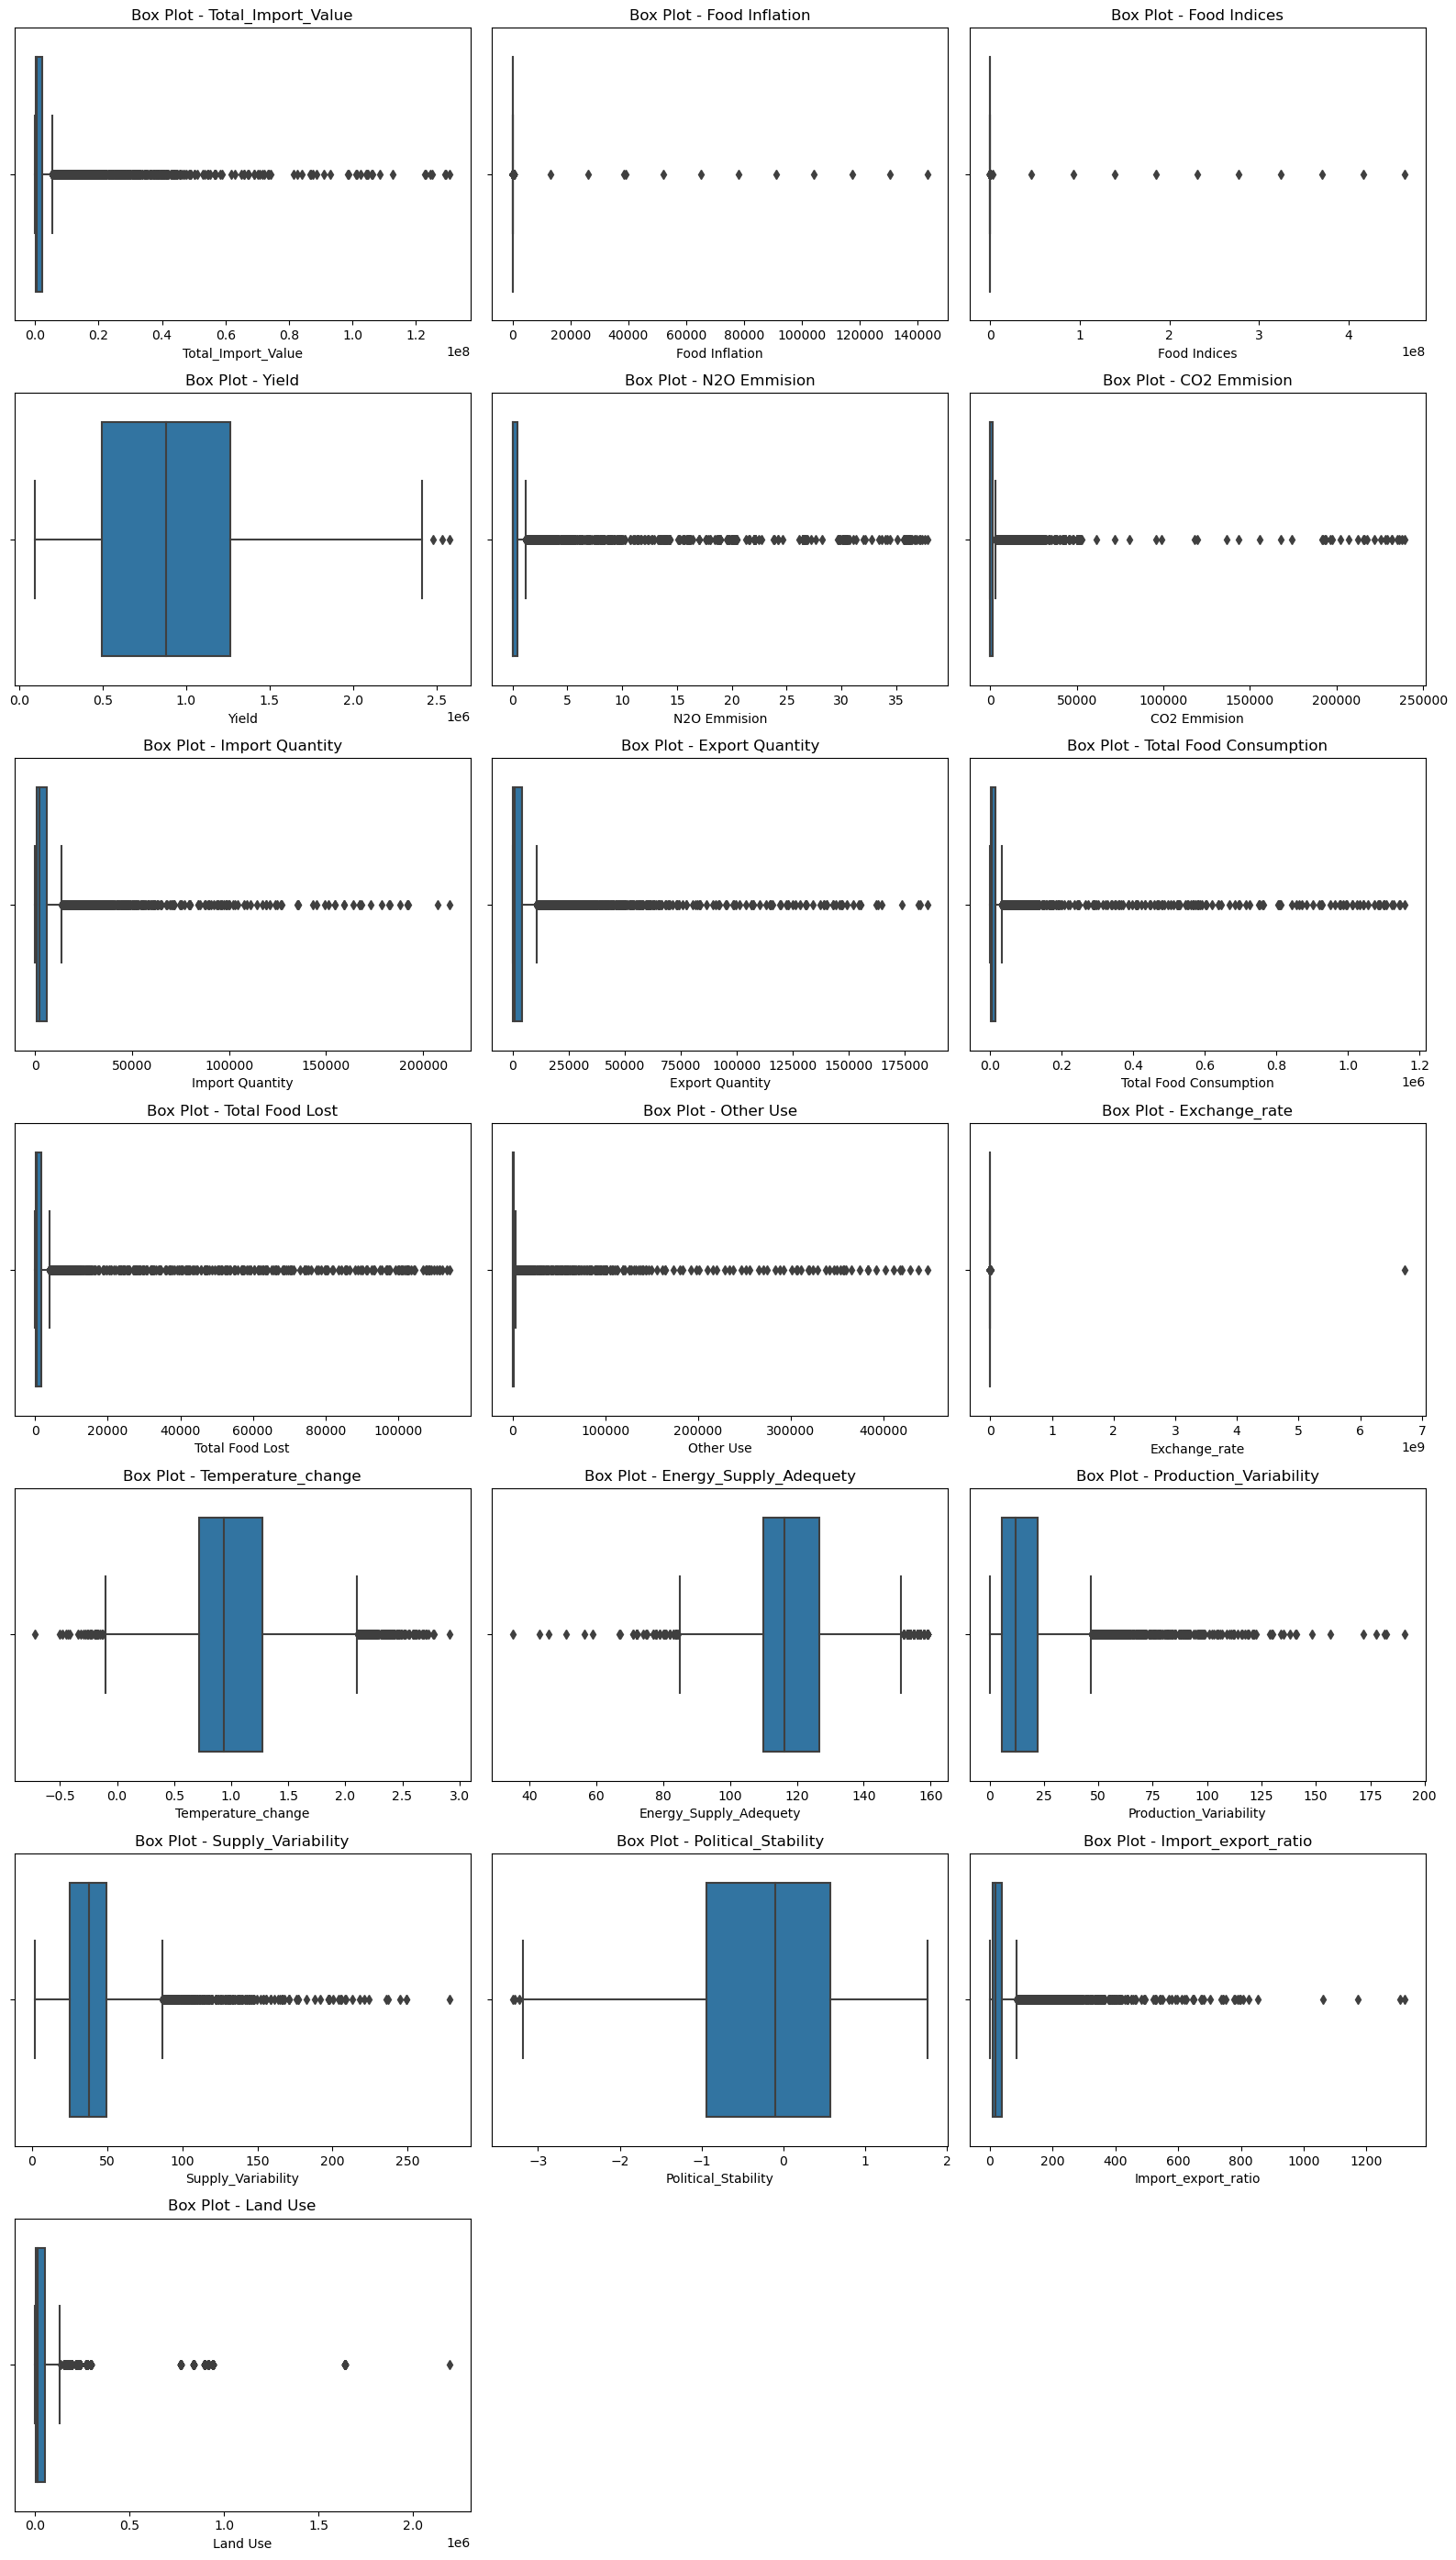

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplots(data):
    # Identifying numeric columns
    numeric_columns = ['Total_Import_Value',
       'Food Inflation', 'Food Indices', 'Yield', 'N2O Emmision',
       'CO2 Emmision', 'Import Quantity', 'Export Quantity',
       'Total Food Consumption', 'Total Food Lost', 'Other Use',
       'Exchange_rate', 'Temperature_change', 'Energy_Supply_Adequety',
       'Production_Variability', 'Supply_Variability', 'Political_Stability',
       'Import_export_ratio', 'Land Use']
    
    # Calculating the number of rows and columns for the subplots
    num_columns = 3
    num_rows = len(numeric_columns) // num_columns + (len(numeric_columns) % num_columns > 0)
    
    # Creating a figure and axes for the box plots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4*num_rows))
    
    # Flattening the axes array for easier indexing
    axes = axes.flatten()
    
    # Iterating over numeric columns and create box plots
    for i, column in enumerate(numeric_columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f"Box Plot - {column}")
        axes[i].set_xlabel(column)
    
    # Removing any unused subplots
    for i in range(len(numeric_columns), num_rows * num_columns):
        fig.delaxes(axes[i])
    
    # Adjusting spacing between subplots
    plt.tight_layout()
    
    # Displaying the plot
    plt.show()
    
create_boxplots(df)

## Checking for outliers through Interquantile Range

In [33]:
import pandas as pd
import numpy as np

def detect_outliers(data):
    # Identifying numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Creating a DataFrame to store outlier information
    outlier_info = pd.DataFrame(columns=['Column', 'Q1', 'Q3', 'IQR', 'Lower_Bound', 'Upper_Bound', 'Number_of_Outliers'])
    
    # Iterating over numeric columns
    for column in numeric_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Defining lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifying outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        
        # Counting the number of outliers
        num_outliers = len(outliers)
        
        # Appending outlier information to the DataFrame
        outlier_info = outlier_info.append({'Column': column, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
                                            'Lower_Bound': lower_bound, 'Upper_Bound': upper_bound,
                                            'Number_of_Outliers': num_outliers}, ignore_index=True)
    
    return outlier_info


outlier_info = detect_outliers(df)

# Printing the outlier information
outlier_info

,Column,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Number_of_Outliers
0,Year,1996.000000,2.012000e+03,1.600000e+01,1.972000e+03,2.036000e+03,0
1,Total_Export_Value,50667.500000,1.887161e+06,1.836494e+06,-2.704073e+06,4.641902e+06,856
2,Total_Import_Value,96169.000000,2.192393e+06,2.096224e+06,-3.048168e+06,5.336730e+06,841
3,Food Inflation,2.133010,1.083422e+01,8.701213e+00,-1.091881e+01,2.388604e+01,323
4,Food Indices,53.859008,9.834302e+01,4.448402e+01,-1.286702e+01,1.650690e+02,100
5,Yield,492914.800000,1.264583e+06,7.716679e+05,-6.645871e+05,2.422085e+06,3
6,N2O Emmision,0.000000,4.750000e-01,4.750000e-01,-7.125000e-01,1.187500e+00,1051
7,CO2 Emmision,0.000000,1.293940e+03,1.293940e+03,-1.940910e+03,3.234850e+03,1100
8,Import Quantity,844.000000,6.016050e+03,5.172050e+03,-6.914075e+03,1.377412e+04,802
9,Export Quantity,265.000000,4.387108e+03,4.122108e+03,-5.918163e+03,1.057027e+04,839


## Plotting Correlation Matrix through Heatmap and checking correlated features

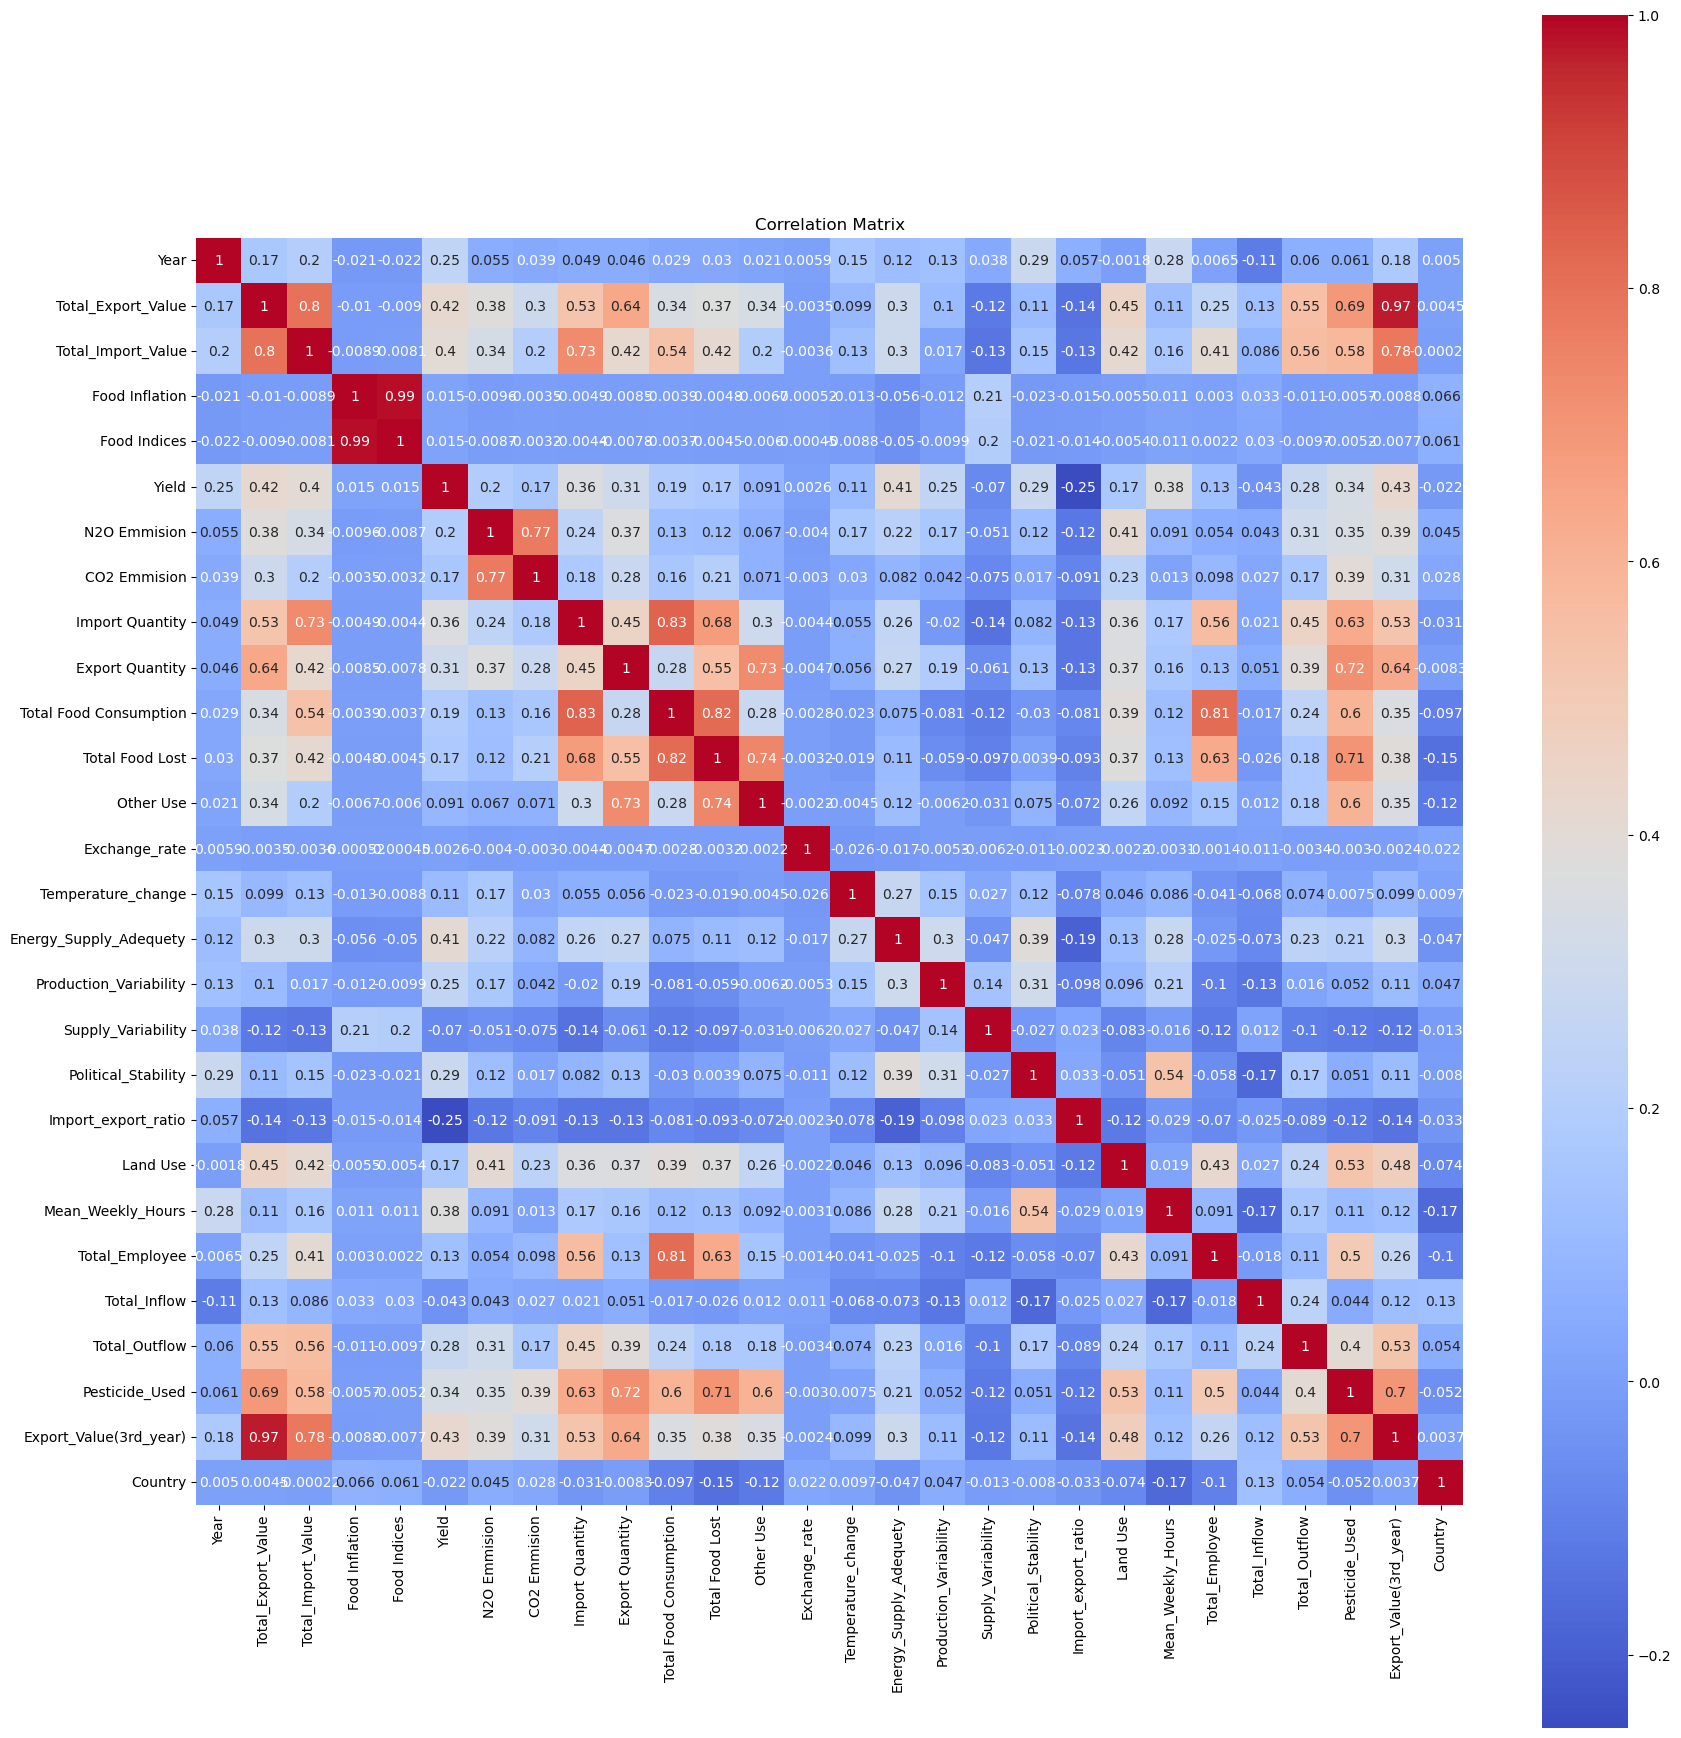


Highly Correlated Features (Threshold = 0.7)
Total_Export_Value and Total_Import_Value: Correlation = 0.80
Total_Export_Value and Export_Value(3rd_year): Correlation = 0.97
Total_Import_Value and Import Quantity: Correlation = 0.73
Total_Import_Value and Export_Value(3rd_year): Correlation = 0.78
Food Inflation and Food Indices: Correlation = 0.99
N2O Emmision and CO2 Emmision: Correlation = 0.77
Import Quantity and Total Food Consumption: Correlation = 0.83
Export Quantity and Other Use: Correlation = 0.73
Export Quantity and Pesticide_Used: Correlation = 0.72
Total Food Consumption and Total Food Lost: Correlation = 0.82
Total Food Consumption and Total_Employee: Correlation = 0.81
Total Food Lost and Other Use: Correlation = 0.74
Total Food Lost and Pesticide_Used: Correlation = 0.71


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation Matrix
plt.figure(figsize=(18, 18))
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
#Defining a loop to check highly correlated features
threshold = 0.7  # Adjusting the threshold to 0.7
highly_correlated = []

for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated.append((numeric_columns[i], numeric_columns[j], corr_matrix.iloc[i, j]))

print("\nHighly Correlated Features (Threshold = {})".format(threshold))
if highly_correlated:
    for pair in highly_correlated:
        print("{} and {}: Correlation = {:.2f}".format(pair[0], pair[1], pair[2]))
else:
    print("No highly correlated features found.")

## Using Sequential Feature Selecter to get best features

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X = df.drop(columns=["Total_Export_Value",'Area'])
y = df["Total_Export_Value"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
# Creating a linear regression model
lm = LinearRegression()
# Setting the number of features you want to select
num_features = 10
# Initializing SequentialFeatureSelector
sfs = SequentialFeatureSelector(lm, n_features_to_select=num_features, direction='forward')
# Fitting the SequentialFeatureSelector on the training data
sfs.fit(X_train, y_train)
# Getting the selected feature names
selected_features = sfs.get_feature_names_out()
# Printing the selected features
print("Selected Features:", selected_features)
# Transforming the original data to include only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)
# Now  train  model on the selected features
lm.fit(X_train_selected, y_train)
# Evaluate the model on the test set
accuracy = lm.score(X_test_selected, y_test)
print("Model Accuracy:", accuracy)

Selected Features: ['Total_Import_Value' 'Yield' 'Import Quantity' 'Export Quantity'
 'Total Food Consumption' 'Political_Stability' 'Land Use'
 'Mean_Weekly_Hours' 'Total_Outflow' 'Export_Value(3rd_year)']
Model Accuracy: 0.9596117458217117


# Model Building , Training and Evaulation 

### Encoding the Cateorogical data

In [36]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df['Country'] = ordinal_encoder.fit_transform(df[['Area']])

### Selecting Suitable features for model training based on EDA

In [37]:
model_df=df[['Area','Year', 'Export_Value(3rd_year)','Total_Import_Value','Total Food Lost', 'Yield','N2O Emmision', 'Exchange_rate', 'Temperature_change', 'Energy_Supply_Adequety',
       'Production_Variability', 'Supply_Variability', 'Political_Stability', 'Import_export_ratio','Country']]

### Defining function to scale and split data

In [38]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split, 
from sklearn.preprocessing import StandardScaler,
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Data preprocessing

def preprocess_data(data):

    scaler = StandardScaler()

    numeric_columns = ['Year','Export_Value(3rd_year)', 'Total_Import_Value','Total Food Lost', 'Yield','N2O Emmision',  'Country', 'Exchange_rate', 'Temperature_change', 'Energy_Supply_Adequety',
       'Production_Variability', 'Supply_Variability', 'Political_Stability', 'Import_export_ratio','Country']
    
   # numeric_columns =  features
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    
    # Splitting the data into features (X) and labels (y)
    X = data.drop(['Export_Value(3rd_year)','Area'], axis=1)
    y = data['Export_Value(3rd_year)']
    
    return X, y



### Defining the Multi Layer Perceptron 

In [39]:
# 3. Building the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2):
        super(MLPModel, self).__init__()
        self.hidden1 = nn.Linear(input_dim, hidden_dim1)
        self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.output = nn.Linear(hidden_dim2, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output(x)
        return x

# 4. Training and evaluating the model
def train_model(X_train, y_train, X_val, y_val, hidden_dim1, hidden_dim2, learning_rate, num_epochs, batch_size):
    # Converting data to PyTorch tensors
    X_train = torch.tensor(X_train.values, dtype=torch.float32)
    y_train = torch.tensor(y_train.values, dtype=torch.float32)
    X_val = torch.tensor(X_val.values, dtype=torch.float32)
    y_val = torch.tensor(y_val.values, dtype=torch.float32)
    
    # Creating DataLoader for mini-batch training
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initializing the model, loss function, and optimizer
    input_dim = X_train.shape[1]
    model = MLPModel(input_dim, hidden_dim1, hidden_dim2)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)
    
    # Training loop
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            # Forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.view(-1, 1))
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Evaluating on the validation set
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val.view(-1, 1))
            
        print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")
    
    return model



### Defining the Prediction and evaulation Function 

In [40]:
# 5. Make predictions on the test set
def predict(model, X_test):
    X_test = torch.tensor(X_test.values, dtype=torch.float32)
    with torch.no_grad():
        y_pred = model(X_test)
    return y_pred.numpy()

# 6. Evaluate performance
def evaluate_performance(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test RMSE: {rmse:.4f}, Test MAE: {mae:.4f}, Test R^2: {r2:.4f}")


### Evaulating the Model

In [64]:
# Prepare the data
data = model_df
    
# Preprocess the data
X, y = preprocess_data(data)
    
# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
    
# Set the hyperparameters
hidden_dim1 = 128
hidden_dim2 = 64
learning_rate = 0.002
num_epochs = 50
batch_size = 32
    
    
# Train the model
model = train_model(X_train, y_train, X_val, y_val, hidden_dim1, hidden_dim2, learning_rate, num_epochs, batch_size)
    
# Make predictions on the test set
y_pred = predict(model, X_test)
    
# Evaluate performance
evaluate_performance(y_test, y_pred)
    
# # Save the model
# torch.save(model.state_dict(), 'mlp_model.pth')

Epoch [1/50], Training Loss: 0.3666, Validation Loss: 0.3531
Epoch [2/50], Training Loss: 0.5039, Validation Loss: 0.3901
Epoch [3/50], Training Loss: 0.0714, Validation Loss: 0.2922
Epoch [4/50], Training Loss: 0.3666, Validation Loss: 0.2949
Epoch [5/50], Training Loss: 0.1910, Validation Loss: 0.3046
Epoch [6/50], Training Loss: 0.8274, Validation Loss: 0.3089
Epoch [7/50], Training Loss: 0.0281, Validation Loss: 0.2253
Epoch [8/50], Training Loss: 0.5905, Validation Loss: 0.2855
Epoch [9/50], Training Loss: 0.0104, Validation Loss: 0.2357
Epoch [10/50], Training Loss: 0.0329, Validation Loss: 0.2720
Epoch [11/50], Training Loss: 0.4031, Validation Loss: 0.2715
Epoch [12/50], Training Loss: 0.2076, Validation Loss: 0.3172
Epoch [13/50], Training Loss: 0.1673, Validation Loss: 0.2767
Epoch [14/50], Training Loss: 0.4131, Validation Loss: 0.2642
Epoch [15/50], Training Loss: 0.3910, Validation Loss: 0.2738
Epoch [16/50], Training Loss: 0.0119, Validation Loss: 0.2440
Epoch [17/50], Tr

### Plotting Graph for predictions 

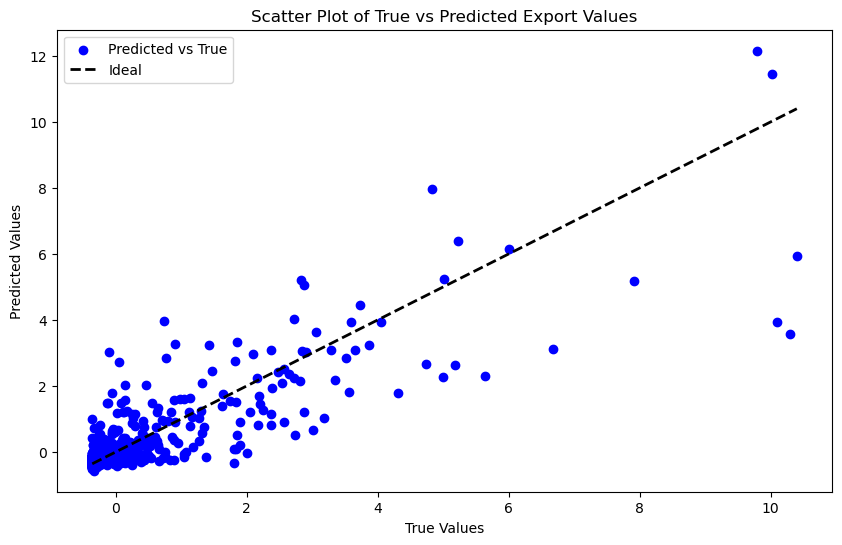

In [62]:
plt.figure(figsize=(10, 6))

# Scatter plot for true vs predicted values
plt.scatter(y_test, y_pred, label='Predicted vs True', color='blue')

# Plotting the line y=x for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')

# Adding labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Export Values')
plt.legend()

# Show plot
plt.show()


### Unscaling the Data

In [65]:
scaler = StandardScaler()

numeric_columns = ['Year','Export_Value(3rd_year)', 'Total_Import_Value','Total Food Lost', 'Yield','N2O Emmision',  'Country', 'Exchange_rate', 'Temperature_change', 'Energy_Supply_Adequety',
       'Production_Variability', 'Supply_Variability', 'Political_Stability', 'Import_export_ratio','Country']
scaler.fit_transform(df[numeric_columns])


array([[-1.39658819, -0.35056408, -0.33140892, ..., -1.91831529,
         2.35146983, -1.71609187],
       [-1.28722953, -0.3506329 , -0.33110808, ..., -1.91831529,
         2.35146983, -1.71609187],
       [-1.17787087, -0.34935081, -0.33076959, ..., -1.91831529,
         2.35146983, -1.71609187],
       ...,
       [-1.72466417, -0.2157785 , -0.34333176, ..., -1.98973531,
        -0.30184471,  1.49991653],
       [-1.72466417, -0.35103876, -0.34333176, ..., -1.98973531,
        -0.30184471,  1.7062914 ],
       [-1.61530551, -0.34970359, -0.34333176, ..., -1.98973531,
        -0.30184471,  1.7062914 ]])

In [66]:
# Extracting the mean and scale (std dev) for the target column
mean_export_value = scaler.mean_[numeric_columns.index('Export_Value(3rd_year)')]
std_export_value = scaler.scale_[numeric_columns.index('Export_Value(3rd_year)')]

# Unscaling the predictions
unscaled_predictions = y_pred * std_export_value + mean_export_value
unscaled_predictions

array([[1541630.2],
       [1098225.5],
       [2117030. ],
       ...,
       [1105406.5],
       [1508466.2],
       [ 536995.5]], dtype=float32)

In [67]:
unscaled_label = y_test * std_export_value + mean_export_value


### Making dataframe for Predictions vs True Values 

In [69]:
results = pd.DataFrame({
    'Instance': y_test.index,
    'True Export Value': unscaled_label,
    'Predictied Export Value': unscaled_predictions.flatten()})

In [70]:
results

,Instance,True Export Value,Predictied Export Value
2317,2317,2641172.00,1541630.25
1782,1782,5896890.93,1098225.50
8608,8608,42128.00,2117030.00
4750,4750,26316.00,321591.75
2845,2845,12194405.00,7646089.00
...,...,...,...
938,938,791574.00,1716033.75
6132,6132,394829.00,1012628.50
3839,3839,143.88,1105406.50
3664,3664,89698.00,1508466.25


### Getting the predictions in CSV File

In [89]:
# Export the DataFrame to a CSV file
results.to_csv('predictions.csv', index=False)

print("DataFrame exported to 'predictions.csv' successfully.")

DataFrame exported to 'predictions.csv' successfully.
